In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [13]:
# generation of random values for weights
np.random.seed(1)
synaptic_weights = 2 * np.random.random((3, 1)) - 1

In [16]:
# sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
# derivative sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

In [18]:
def ReLU(x):
    return x * (x > 0)

In [19]:
def ReLU_derivative(x):
    return x > 0

In [28]:
D = 10

X = np.linspace(0-D, 0+D, 210)

In [29]:
Ys = sigmoid(X)

# d_sigmoid(sigmoid(X))
dYs = sigmoid_derivative(Ys)

In [30]:
Yr = ReLU(X)

# d_ReLU(ReLU(X))
dYr = ReLU_derivative(Yr)

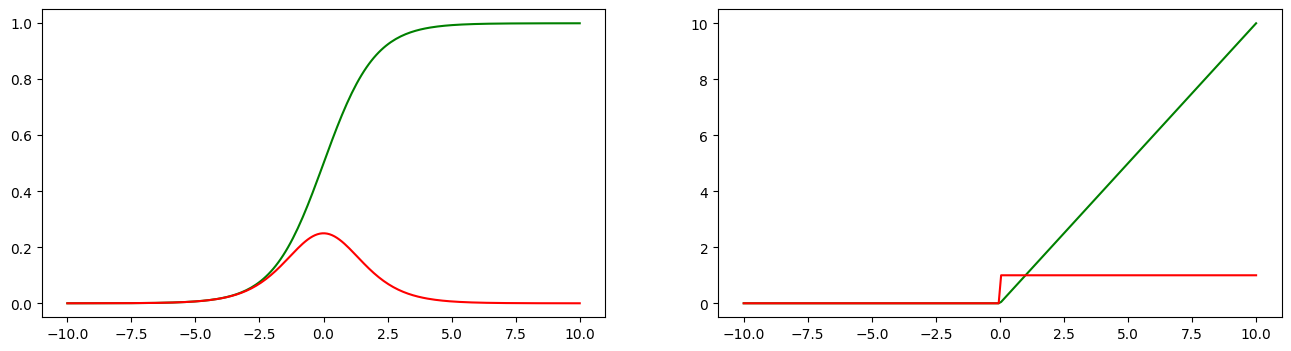

In [33]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(X, Ys, '-g', label="Sigmoid")
plt.plot(X, dYs, '-r', label="Derivative Sigmoid")

plt.subplot(1, 2, 2)
plt.plot(X, Yr, '-g', label="ReLU")
plt.plot(X, dYr, '-r', label="Derivative ReLU")

plt.show()

In [34]:
# Train NN

# x * w
def run_nn(inputs):
    global synaptic_weights
    inputs = inputs.astype(float)
    outputs = sigmoid(np.dot(inputs, synaptic_weights))
    return outputs

def train_nn(training_inputs, training_outputs, training_iterations):
    global synaptic_weights

    for iteration in range(training_iterations):
        output = run_nn(training_inputs)

        error = training_outputs - output

        adjustments = np.dot(training_inputs.T, error * sigmoid_derivative(output)) * 0.1

        synaptic_weights += adjustments

In [49]:
# dataset
training_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_outputs = np.array([[0, 1, 1, 0]]).T

train_nn(training_inputs, training_outputs, 2000)
print(f"Weights after training:\n {synaptic_weights}")

Weights after training:
 [[ 6.24861326]
 [-0.2187868 ]
 [-2.90586152]]


In [50]:
# 3 numbers of users
user_input1 = str(input("First value: 0 | 1:"))
user_input2 = str(input("Second value: 0 | 1"))
user_input3 = str(input("Third value: 0 | 1"))

print(f"values users: {user_input1}, {user_input2}, {user_input3}")

values users: 1, 1, 1


In [51]:
print("Prediction:")
print(run_nn(np.array([user_input1, user_input2, user_input3])))

Prediction:
[0.95787052]
